In [203]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import math

In [273]:
#constants and useful quantities
hbar = 1.054571817E-34
L = 1
x = np.linspace(0,L,1000)
m = 9.1093837E-31
w = np.pi**2*hbar/(2*m*L**2)

revival = 4*m*L**2/(np.pi*hbar)

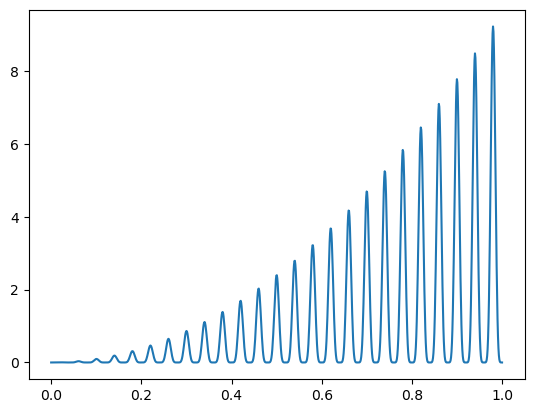

In [275]:
# My initial wavefunction squared
norm = np.sqrt(integrate.quad(lambda x: (x*np.sin(25*np.pi*x/L)**3)**2,0,L))
norm = 1/norm[0]
plt.plot(x, (norm*x*np.sin(25*np.pi*x/L)**3)**2)

In [276]:
#stationary states

norm = np.sqrt(integrate.quad(lambda x: (x*np.sin(25*np.pi*x/L)**3)**2,0,L))
norm = 1/norm[0]
wave = 0
E = []
c = []
wavefunc = []

for n in np.arange(0,100):
    En = n**2*w
    cn = integrate.quad(lambda x: norm*np.sqrt(2/L)*x*np.sin(25*np.pi*x/L)**3*np.sin(n*np.pi*x/L), 0, L)
    cn = cn[0]
    c.append(cn)
    E.append(En)
    wave = cn*np.sqrt(2/L)*np.sin(n*np.pi*x/L) + wave
    wavefunc.append(wave)

/tmp/ipykernel_4084923/558353739.py:12: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  cn = integrate.quad(lambda x: norm*np.sqrt(2/L)*x*np.sin(25*np.pi*x/L)**3*np.sin(n*np.pi*x/L), 0, L)


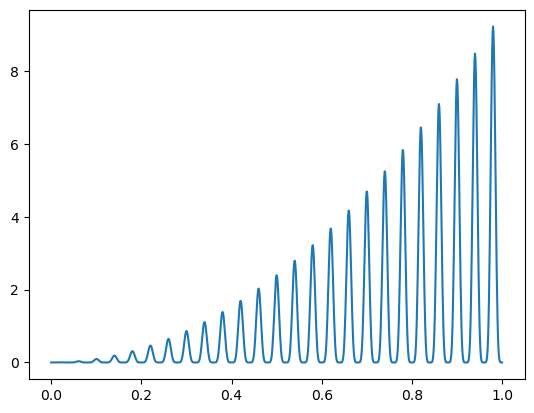

In [277]:
plt.plot(x, wavefunc[99]**2)

In [278]:
#time dependent states 

norm = np.sqrt(integrate.quad(lambda x: (x*np.sin(25*np.pi*x/L)**3)**2,0,L))
norm = 1/norm[0]
#wave = 0
E = []
c = []
wavefunc = []
timewave = 0
timewaven = []
timewavefunc = []
wave = []
for time in np.arange(0,22200, 220):
    wave.append(0)
    for n in np.arange(0,50):
        En = n**2*w
        cn = integrate.quad(lambda x: norm*np.sqrt(2/L)*x*np.sin(25*np.pi*x/L)**3*np.sin(n*np.pi*x/L), 0, L)
        cn = cn[0]
        c.append(cn)
        E.append(En)
        wave[int(time/220)] = cn*np.sqrt(2/L)*np.sin(n*np.pi*x/L)*np.exp(-1j*En*time) + wave[int(time/220)]
        #wavefunc.append(wave)
    
    timewavefunc.append(0)
    timewavefunc[int(time/220)] = wave[int(time/220)]*np.conj(wave[int(time/220)])


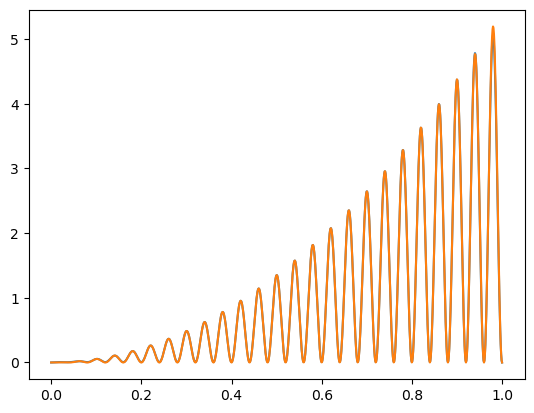

In [279]:
plt.plot(x,timewavefunc[100])
plt.plot(x,timewavefunc[0])

In [280]:
import imageio

def create_frame(t):
    fig = plt.figure(figsize=(6, 6))
    plt.plot(x, timewavefunc[t], color = 'grey' )
    plt.xlim([0,1])
    plt.xlabel('x', fontsize = 14)
    plt.ylim([0,6])
    plt.ylabel('y', fontsize = 14)
    plt.title(f'Infinite Square Well Over Time {t}',
              fontsize=14)
    plt.savefig(f'/home/brandon.oneal/School_Work/img3/img_{t}.png', 
                transparent = False,  
                facecolor = 'white'
               )
    plt.close()

In [282]:
time = np.arange(0,100)
for t in time:
    create_frame(t)

In [283]:
frames = []
for t in time:
    image = imageio.v2.imread(f'/home/brandon.oneal/School_Work/img3/img_{t}.png')
    frames.append(image)

In [284]:
imageio.mimsave('img3.gif', # output gif
                frames,          # array of input frames
                fps = 10)         # optional: frames per second